<div align="center">
    <h1>Statistical Analysis for User Churn</h1>
</div>

> **Project Disclaimer** : For the purposes of this project, an external case study and a relevant synthetic dataset were used, but the actual implementation was carried out independently.

---

<div align="center">
    <h1>Waze User Churn Prevention</h1>
</div>

<div align="center">
    <h2>Executive Summary</h2>
</div>

**Project Title**: Statistical Analysis for User Churn Prevention in Waze

**Project Overview**: This project aims to analyze and prevent user churn in the Waze navigation app. User churn refers to users discontinuing their use of the app. The focus is on developing a machine learning model to predict monthly user churn, leading to improved user retention and data-driven product development decisions.

**Data Evaluation**:

-   The dataset contains 14,999 records and 13 columns.
-   There are 700 missing values in the "Label" column, but they appear to be random.
-   A statistical test shows no significant statistical difference between the records with missing values and those without.
-   Data transformations were performed to add new features and handle outliers.
-   Key insights from the dataset include user engagement patterns, driving habits, and more.

**Logistic Regression Model**:

-   The initial logistic regression model had an accuracy of 82%.
-   Precision was around 51%, recall was 11%, and F1-score was 18%.
-   The model was considered suboptimal due to low recall.

**Comparison of Models**:

-   Logistic regression, Random Forest, and XGBoost models were compared.
-   Random Forest had an accuracy of 82.13% and 12.77% recall.
-   XGBoost had the lowest accuracy at 80.65% but better balance with 40.26% precision and 18.56% recall, resulting in a higher F1-score of 25.41%.

**Hyperparameter Tuning for XGBoost**:

-   XGBoost was fine-tuned with hyperparameter tuning.
-   The best-fit XGBoost model showed an accuracy of 79.05%, improved recall, and F1-score.

**Key Considerations**:

-   The XGBoost model, while not perfect, exhibits better F1-score after hyperparameter tuning.
-   This model should be used cautiously, and further exploratory efforts are advised.
-   Decisions to use this model should align with specific business contexts and goals.

**Conclusion**: The XGBoost model can be a valuable tool for guiding further exploratory efforts and identifying areas for data improvement, making it useful in a research and development context.

---
<div align="center">
    <h2>Data Dictionary</h2>
</div>

| Column Name                 | Data Type    | Description                                                          |
|:----------------------------|:-------------|---------------------------------------------------------------------:|
| ID                          | int          | A sequential numbered index                                          |
| Label                       | obj          | Binary target variable ("retained" vs "churned")                     |
| Sessions                    | int          | Number of times a user opens the app during the month                |
| Drives                      | int          | Number of times a user drives at least 1 km during the month         |
| totalSessions               | float        | Model estimate of the total number of sessions since user onboarding |
| nDaysAfterOnboarding        | int          | Number of days since a user signed up for the app                    |
| totalNavigationsF1          | int          | Total navigations to the user's favorite place 1 since onboarding    |
| totalNavigationsF2          | int          | Total navigations to the user's favorite place 2 since onboarding    |
| drivenKM                    | float        | Total kilometers driven during the month                             |
| durationMins                | float        | Total duration driven in minutes during the month                    |
| activityDays                | int          | Number of days the user opens the app during the month               |
| drivingDays                 | int          | Number of days the user drives at least 1 km during the month        |
| Device                      | obj          | Type of device a user starts a session with                          |

---
<div align="center">
    <h2>Statistical Analysis and Predictive Modeling</h2>
</div>

## Data Evaluation

<div align="center">
    <b>Import Python Packages</b>
</div>

In [1]:
import os
import numpy
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

<div align="center">
    <b>Load the Dataset into Python</b>
</div>

In [2]:
current_working_directory = os.getcwd()
filepath = current_working_directory + "\\Datasets\\WazeDataset.csv"

dataset = pandas.read_csv(filepath)

<div align="center">
    <b>Initial Exploration</b>
</div>

- Displaying the size of the dataset.
- Displaying a random sample of the dataset.
- Displaying the structure of the dataset.

In [3]:
print("\033[0;33;40m Dataset Size - Rows x Columns : ", dataset.shape)

print("\n Dataset Sample ")
display(dataset.sample(n=10, random_state=15)) # Setting the random seed for reproducibility

print("\033[0;33;40m\n Dataset Structure \033[0;0m")
display(dataset.info())

 Dataset Size - Rows x Columns :  (14999, 13)

 Dataset Sample 


,ID,Label,Sessions,Drives,totalSessions,nDaysAfterOnboarding,totalNavigationsF1,totalNavigationsF2,drivenKM,durationMins,activityDays,drivingDays,Device
5716,5716,retained,46,37,169.749026,1100,0,53,4448.630961,1211.590117,25,19,iPhone
14475,14475,retained,39,32,222.083662,2242,0,43,1801.438640,314.018230,9,7,Android
1944,1944,retained,13,11,89.028508,2536,0,0,2272.787955,1669.938410,7,3,iPhone
9760,9760,retained,87,70,124.042885,1370,9,115,5835.679449,3558.989353,15,7,Android
13078,13078,retained,23,19,242.506745,671,0,0,6486.646770,4042.876384,3,0,iPhone
6675,6675,retained,91,74,104.519823,3425,456,0,1732.545511,984.220770,11,4,iPhone
4901,4901,churned,13,13,76.024349,3209,93,0,1334.517508,1092.137663,4,4,iPhone
13166,13166,retained,23,19,67.555141,3239,1,66,4078.369493,2117.530935,3,3,Android
5763,5763,retained,61,61,183.421072,985,75,0,2202.681217,1255.338122,5,2,Android
12790,12790,retained,74,60,152.872067,3129,48,27,1408.342250,200.035586,20,20,iPhone



 Dataset Structure 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    14999 non-null  int64  
 1   Label                 14299 non-null  object 
 2   Sessions              14999 non-null  int64  
 3   Drives                14999 non-null  int64  
 4   totalSessions         14999 non-null  float64
 5   nDaysAfterOnboarding  14999 non-null  int64  
 6   totalNavigationsF1    14999 non-null  int64  
 7   totalNavigationsF2    14999 non-null  int64  
 8   drivenKM              14999 non-null  float64
 9   durationMins          14999 non-null  float64
 10  activityDays          14999 non-null  int64  
 11  drivingDays           14999 non-null  int64  
 12  Device                14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


None

<div align="center">
    <b>Initial Discoveries</b>
</div>

> There are a total of 14,999 records and 13 columns.

> The random sample of observations do not have any missing values, but the dataset structure reveals 700 missing values in the **Label** column.

> Continuing to examine if the records with missing values are non random.

In [4]:
datasetWithNullValues = dataset[dataset.isnull().any(axis=1)]
datasetWithoutNullValues = dataset[dataset.notna().all(axis=1)]

- Creating a subset of the dataset with records that HOLD null values
- Creating a subset of the dataset with records that DO NOT HOLD null values
- Performing an **F-test (Levene's test)** to compare the variances between two subsets.
- Performing an **Welch's t-test** to compare the mean between two subsets.
- The **p-value** resulting from the tests will be compared with significance level (**alpha**) to determine if there is a significant statistical difference between the two subsets.

In [5]:
alpha = 0.001

sigVarianceDiff = sigMeanDiff = False 

for column in datasetWithoutNullValues.columns:
    if datasetWithoutNullValues[column].dtype in (int, float):
        _, p_value_variance = stats.levene(datasetWithoutNullValues[column], datasetWithNullValues[column])
        if p_value_variance < alpha:
            sigVarianceDiff = True
            
        _, p_value_mean = stats.ttest_ind(datasetWithoutNullValues[column], datasetWithNullValues[column], equal_var=False)
        if p_value_mean < alpha:
            sigMeanDiff = True

if sigVarianceDiff:
    print("\033[0;33;40m Significant statistical difference in variances between the two subsets. ")
else:
    print("\033[0;33;40m No significant statistical difference in variances between the two subsets. ")

if sigMeanDiff:
    print("\n\033[0;33;40m Significant statistical difference in means between the two subsets. ")
else:
    print("\n\033[0;33;40m No significant statistical difference in means between the two subsets. ")

 No significant statistical difference in variances between the two subsets. 

 No significant statistical difference in means between the two subsets. 


> Since there is no significant statistical difference between the two subsets, let's check if there is a difference in distribution ratios for the only other object column **Device** type

> Performing the **chi-squared** test on the contingency tables to compare the distribution ratios.

In [6]:
D1 = datasetWithNullValues['Device']
D2 = datasetWithoutNullValues['Device']

contingencyTables1 = pandas.crosstab(index=D1, columns="Count")
contingencyTables2 = pandas.crosstab(index=D2, columns="Count")

_, p, _, _ = stats.chi2_contingency([contingencyTables1, contingencyTables2])

if p < alpha:
    print("\033[0;33;40m Significant difference in the distribution ratios. ")
else:
    print("\033[0;33;40m No significant difference in the distribution ratios. ")

 No significant difference in the distribution ratios. 


<div align="center">
    <b>Upon Further Examination</b>
</div>

- The records with missing values are random without any significant statistical difference.
	- Confidence level - 99.9%
- Hence, removing the 700 records with missing values from the 14,999 records in the dataset for further analysis

In [7]:
newDataset = datasetWithoutNullValues

<div align="center">
    <b>Next Steps</b>
</div>

- Displaying the Percentage of Retained vs. Churned Users.
- Check if there is a difference in distribution ratios for the only other object column **Device** type between Retained and Churned Users, using the **chi-squared test**.

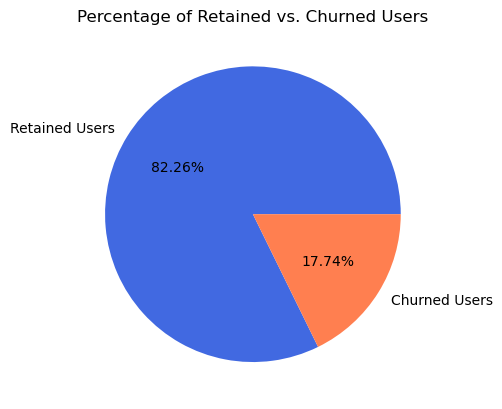

In [8]:
distribution_ratios = newDataset['Label'].value_counts(normalize=True)

chartLabels = ['Retained Users', 'Churned Users']
chartColours = ['RoyalBlue', 'Coral']

plt.pie(distribution_ratios, labels=chartLabels, autopct='%1.2f%%', colors=chartColours)
plt.title('Percentage of Retained vs. Churned Users')

plt.show()

In [9]:
D1 = newDataset[newDataset['Label'] == 'retained']
D2 = newDataset[newDataset['Label'] == 'churned']

contingencyTables1 = pandas.crosstab(index=D1['Label'], columns="Count")
contingencyTables2 = pandas.crosstab(index=D2['Label'], columns="Count")

_, p, _, _ = stats.chi2_contingency([contingencyTables1, contingencyTables2])

if p < alpha:
    print("\033[0;33;40m Significant difference in the distribution ratios. ")
else:
    print("\033[0;33;40m No significant difference in the distribution ratios. ")

 No significant difference in the distribution ratios. 


> No significant difference in the ratio of iPhone users and Android users between the churned group and the retained users.

- Let's display the Percentage of iPhone vs. Android Users.

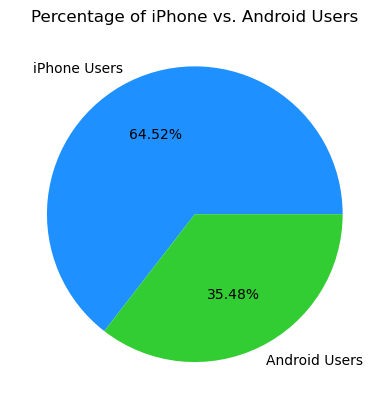

In [10]:
distribution_ratios = newDataset['Device'].value_counts(normalize=True)

chartLabels = ['iPhone Users', 'Android Users']
chartColours = ['DodgerBlue', 'LimeGreen']

plt.pie(distribution_ratios, labels=chartLabels, autopct='%1.2f%%', colors=chartColours)
plt.title('Percentage of iPhone vs. Android Users')

plt.show()

<div align="center">
    <b>Further Analysis</b>
</div>

> Now let's now check the **distribution** of values to decide on using mean or median for comparisons.

In [11]:
numeric_columns = newDataset.select_dtypes(include=['int', 'float'])
skewness_data = []

for col in numeric_columns.columns:
    skewness = stats.skew(newDataset[col])

    if skewness < -1:
        skewness_label = "Strongly Left Skewed"
    elif -1 <= skewness < -0.5:
        skewness_label = "Moderately Left Skewed"
    elif -0.5 <= skewness < 0.5:
        skewness_label = "Approximately Symmetric (Bell-Shaped)"
    elif 0.5 <= skewness < 1:
        skewness_label = "Moderately Right Skewed"
    else:
        skewness_label = "Strongly Right Skewed"
    
    skewness_data.append([col, skewness_label])

skewness_df = pandas.DataFrame(skewness_data, columns=["Column Name", "Skewness Category"])
display(skewness_df)

,Column Name,Skewness Category
0,ID,Approximately Symmetric (Bell-Shaped)
1,Sessions,Strongly Right Skewed
2,Drives,Strongly Right Skewed
3,totalSessions,Strongly Right Skewed
4,nDaysAfterOnboarding,Approximately Symmetric (Bell-Shaped)
5,totalNavigationsF1,Strongly Right Skewed
6,totalNavigationsF2,Strongly Right Skewed
7,drivenKM,Strongly Right Skewed
8,durationMins,Strongly Right Skewed
9,activityDays,Approximately Symmetric (Bell-Shaped)


- Since **7 out of 11** columns have **Strongly Right Skewed** value distributions, we will be using median values for comparison.

In [12]:
newDataset.groupby('Label').median(numeric_only=True)

,ID,Sessions,Drives,totalSessions,nDaysAfterOnboarding,totalNavigationsF1,totalNavigationsF2,drivenKM,durationMins,activityDays,drivingDays
Label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


<div align="center">
    <b>Taking a more granular look</b>
</div>

- Calculating Median Kilometers per Drive
- Calculating Median Kilometers per Driving Day
- Calculating Median Drives per Driving Day

In [13]:
medianCalcs = newDataset.groupby('Label').median(numeric_only=True)

print('\033[0;33;40m Median Kilometers per Drive ')
display(medianCalcs['drivenKM'] / medianCalcs['Drives'])

print('\033[0;33;40m Median Kilometers per Driving Day ')
display(medianCalcs['drivenKM'] / medianCalcs['drivingDays'])

print('\033[0;33;40m Median Drives per Driving Day ')
display(medianCalcs['Drives'] / medianCalcs['drivingDays'])

 Median Kilometers per Drive 


Label
churned     73.053113
retained    73.716694
dtype: float64

 Median Kilometers per Driving Day 


Label
churned     608.775944
retained    247.477472
dtype: float64

 Median Drives per Driving Day 


Label
churned     8.333333
retained    3.357143
dtype: float64

<div align="center">
    <b>Insights from Median Analysis</b>
</div>

- Retained users exhibit a substantially longer engagement duration, with an average of approximately 520 days more since their initial sign-up compared to churned users.
	- This extended user lifetime may indicate stronger user loyalty and satisfaction with the platform.

- In contrast to their longer engagement, retained users drove approximately 190 kilometers and spent 150 minutes less on the road during the last month compared to churned users.
	- This suggests that retained users may have more efficient or shorter trips, or they may rely on the app for different driving purposes.

- Retained users demonstrate a significantly higher level of activity and engagement with the app. They open the app more frequently and have gone on drives over two times the frequency of churned users.
	- This heightened user interaction suggests that retained users find the app more integral to their daily routines and driving activities.

- In terms of driving efficiency, retained users demonstrate an interesting pattern. They have approximately less than half the number of drives per driving day compared to churned users.
	- This may suggest that retained users have longer and more consolidated driving trips, potentially indicating a difference in driving habits or travel needs.

- Furthermore, retained users have driven approximately 360 kilometers less per driving day compared to churned users.
	- This implies that churned users, on average, cover greater distances during their driving days. The difference in driving intensity may be influenced by factors such as work commutes, travel preferences, or geographical factors.

## Visual Data Exploration


As previously noted, **7 out of 11** columns have **Strongly Right Skewed** value distributions. Let's visualize them.
- And since the **ID** column is just an index, there's no need to visualize it.

Median = 56.00


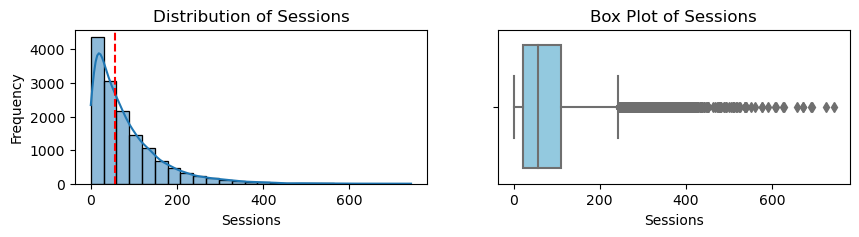

Median = 48.00


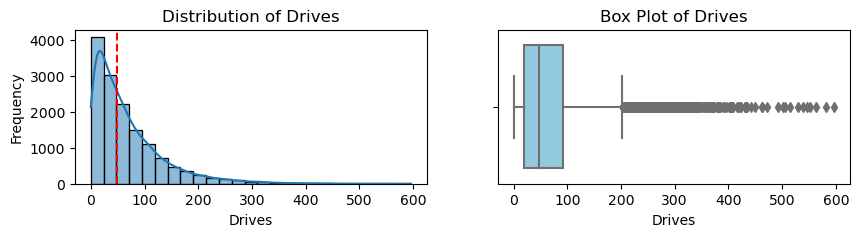

Median = 158.72


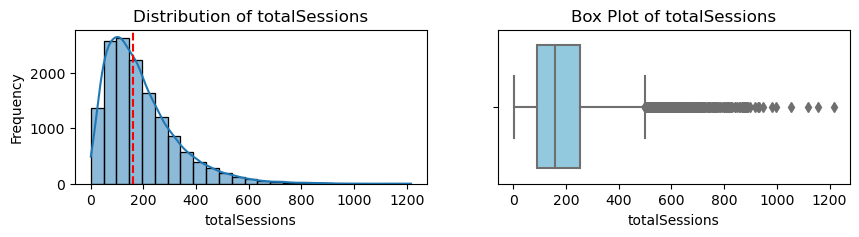

Median = 1749.00


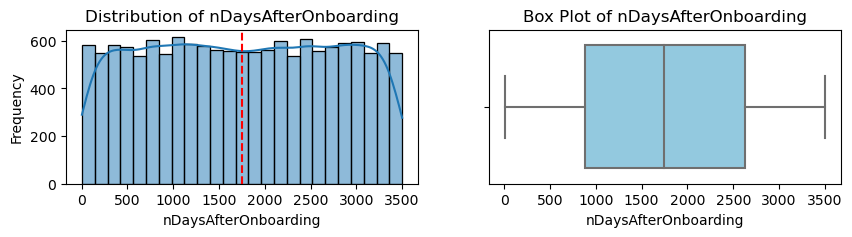

Median = 71.00


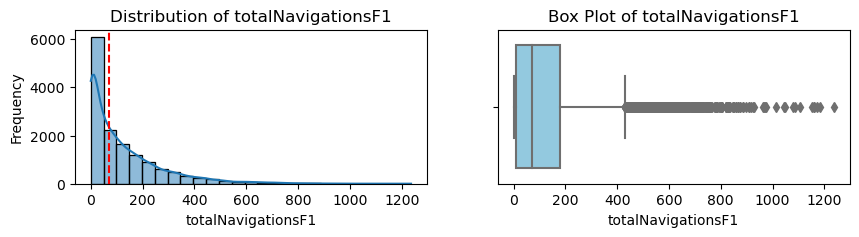

Median = 9.00


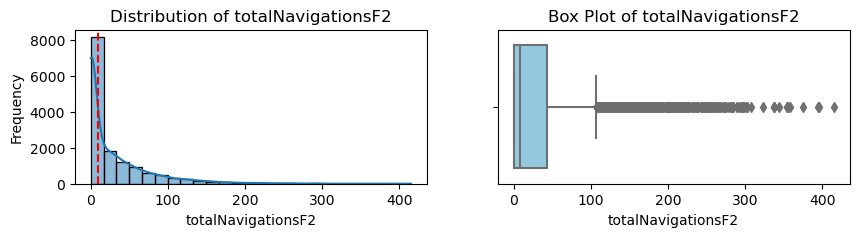

Median = 3496.55


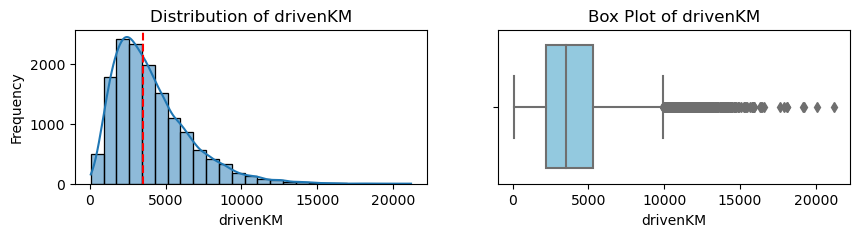

Median = 1479.39


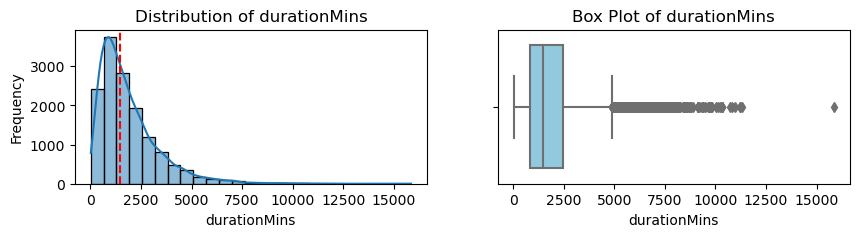

Median = 16.00


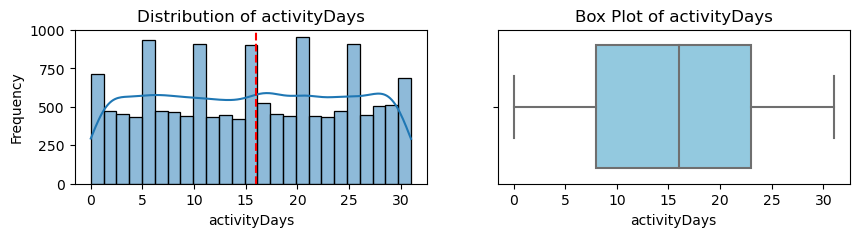

Median = 12.00


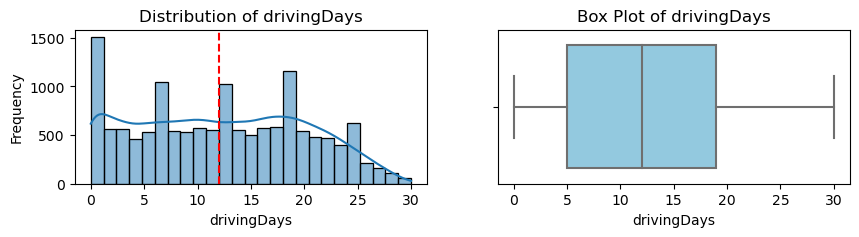

In [14]:
plotColumns = ['Sessions', 'Drives', 'totalSessions', 'nDaysAfterOnboarding',
               'totalNavigationsF1', 'totalNavigationsF2',
               'drivenKM', 'durationMins', 'activityDays', 'drivingDays']

for column in plotColumns:
    plt.figure(figsize=(10, 2))

    plt.subplot(1, 2, 1)
    sns.histplot(x=newDataset[column], bins=25, kde=True)

    median = newDataset[column].median()
    plt.axvline(median, color='Red', linestyle='--')

    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

    #---

    plt.subplot(1, 2, 2)
    sns.boxplot(x=newDataset[column], color='SkyBlue')

    plt.title(f'Box Plot of {column}')
    plt.xlabel(f'{column}')

    #---
    print(f'Median = {median:.2f}')
    plt.show()

<div align="center">
    <b>Key Takeaways</b>
</div>


- Both **Sessions** and **Drives** exhibit a right-skewed distribution with medians of 56 and 48, respectively.
- **totalSessions**, with a right-skewed distribution and median of approximately 160, suggests that a significant portion of users' estimated total sessions occurs in the last month.
- User tenure shows a uniform distribution, ranging up to around 3500 days.
- Last month's drives per user are right-skewed, with half driving under 3,495 kilometers.
- **durationMins** is also skewed, with half of users driving for less than approximately 25 hours.
- Users opened the app a median of 16 times last month, and the number of days users drove each month is almost uniform and correlates with the number of days they opened the app.

<div align="center">
    <b>Let's compare in App Activity vs Actual Driving </b>
</div>

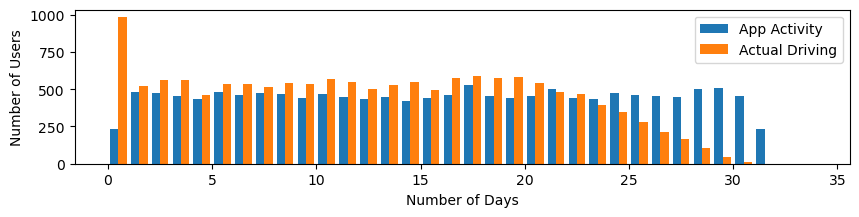

In [15]:
plt.figure(figsize=(10, 2))
label=['App Activity', 'Actual Driving']
plt.hist([ newDataset['activityDays'], newDataset['drivingDays'] ], bins=range(0,35), label=label)
plt.xlabel('Number of Days')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

- The data clearly distinguishes between the maximum number of app activity days (31 days) and actual driving days (up to 30 days), indicating that no user in the dataset drove every day of the month.
    - This assumption aligns with the notion of a month having 31 days based on in-app activity records.
- In contrast to in-app activity, a significant number of users (close to 1,000) did not drive at all during the month.
- Notably, as the number of days users engage in driving increases, the number of active drivers decreases. However, the level of in-app activity remains relatively consistent.
    - Approximately 450-500 users fall into this category, with roughly 250 users recording 0 days of activity and 31 days of activity.

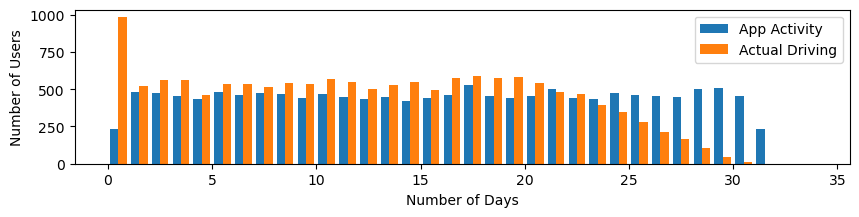

In [16]:
plt.figure(figsize=(10, 2))
label=['App Activity', 'Actual Driving']
plt.hist([ newDataset['activityDays'], newDataset['drivingDays'] ], bins=range(0,35), label=label)
plt.xlabel('Number of Days')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

> **Now let's examine the churn rate in relation to the number of days users have had driving experiences.**

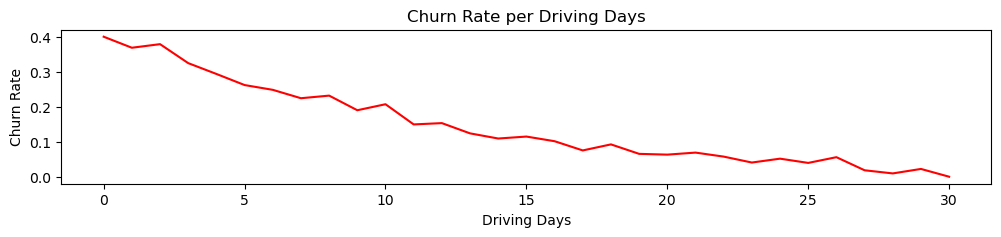

In [17]:
churnTable = newDataset.groupby(['Label', 'drivingDays'])['ID'].count()
churnTable = churnTable.unstack().T
churnTable['Churn Rate'] = churnTable['churned'] / (churnTable['churned'] + churnTable['retained'])
churnTable.fillna(0, inplace=True)

plt.figure(figsize=(12, 2))
plt.plot(churnTable.index, churnTable['Churn Rate'], label='Churn Rate', color='Red')
plt.xlabel('Driving Days')
plt.ylabel('Churn Rate')
plt.title('Churn Rate per Driving Days')
plt.show()

> Overall, there is an inverse relationship between the number of driving days and the churn rate, suggesting that users who drive more frequently are more likely to be retained.

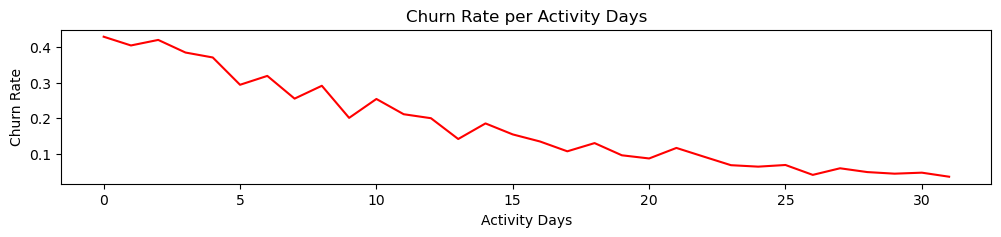

In [18]:
churnTable = newDataset.groupby(['Label', 'activityDays'])['ID'].count()
churnTable = churnTable.unstack().T
churnTable['Churn Rate'] = churnTable['churned'] / (churnTable['churned'] + churnTable['retained'])
churnTable.fillna(0, inplace=True)

plt.figure(figsize=(12, 2))
plt.plot(churnTable.index, churnTable['Churn Rate'], label='Churn Rate', color='Red')
plt.xlabel('Activity Days')
plt.ylabel('Churn Rate')
plt.title('Churn Rate per Activity Days')
plt.show()

> We see a similar relationship between the number of activity days and the churn rate, suggesting that users who use the app more frequently are more likely to be retained.

## Data Transformation

- Expanding the dataset with the following new data columns
	- Kilometers per drive
	- Kilometers per driving day
	- Drives per driving day
	- Percentage of in app sessions in last month
	- In app sessions per day
	- Average speed per drive (KM/H)
	- Average distance per drive (KM)
- Replace any infinity or NaN values created from the addition of the new columns
- Create substitute measures columns for the categorical columns
- Drop the **ID** column since it does not effect the users behavior 

In [19]:
pandas.options.mode.chained_assignment = None

In [20]:
newDataset['kmPerDrive'] = newDataset['drivenKM'] / newDataset['Drives']
newDataset['kmPerDrivingDay'] = newDataset['drivenKM'] / newDataset['drivingDays']
newDataset['drivesPerDrivingDay'] = newDataset['Drives'] / newDataset['drivingDays']
newDataset['sessionsPercentageInLastMonth'] = newDataset['Sessions'] / newDataset['totalSessions']
newDataset['sessionsPerDay'] = newDataset['totalSessions'] / newDataset['nDaysAfterOnboarding']
newDataset['avgSpeed'] = newDataset['drivenKM'] / (newDataset['durationMins'] / 60)
newDataset['avgKmPerDrive'] = newDataset['drivenKM'] / newDataset['Drives']

newDataset.fillna(0, inplace=True)
newDataset.replace([numpy.inf, -numpy.inf], 0, inplace=True)

newDataset['DeviceB'] = numpy.where(newDataset['Device'] == 'Android', 0, 1)
newDataset['LabelB'] = numpy.where(newDataset['Label'] == 'churned', 1, 0)

newDataset.drop(columns=['ID'], inplace=True)

<div align="center">
    <b>Closer Look at Distributions</b>
</div>

In [21]:
percentiles = [5, 10, 25, 50, 75, 90, 95, 99, 100]
quartiles = newDataset.select_dtypes(include=[numpy.number]).quantile(numpy.array(percentiles) / 100)

quartiles = quartiles.T.reset_index()
quartiles.columns = ['Column Name'] + [f'Q{p}' for p in percentiles]

display(quartiles.round(2))

,Column Name,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q99,Q100
0,Sessions,4.00,8.00,23.00,56.00,111.00,184.20,243.00,373.00,743.00
1,Drives,4.00,8.00,20.00,48.00,93.00,152.00,200.00,306.02,596.00
2,totalSessions,33.89,50.09,90.46,158.72,253.54,370.20,455.44,643.59,1216.15
3,nDaysAfterOnboarding,176.90,357.80,878.50,1749.00,2627.50,3147.20,3314.00,3466.00,3500.00
4,totalNavigationsF1,0.00,0.00,10.00,71.00,178.00,320.00,422.00,664.00,1236.00
5,totalNavigationsF2,0.00,0.00,0.00,9.00,43.00,88.00,124.00,208.00,415.00
6,drivenKM,1060.18,1417.86,2217.32,3496.55,5299.97,7427.97,8898.72,12283.04,21183.40
7,durationMins,319.35,475.17,840.18,1479.39,2466.93,3753.17,4668.18,6974.61,15851.73
8,activityDays,1.90,3.00,8.00,16.00,23.00,28.00,29.00,31.00,31.00
9,drivingDays,0.00,1.00,5.00,12.00,19.00,23.00,25.00,28.00,30.00


There are apparent outliers in several key columns, including 'drivenKM,' 'durationMins,' 'kmPerDrive,' 'kmPerDrivingDay,' 'avgSpeed,' and 'avgKmPerDrive.' For example, we have instances with extreme values, such as an average speed of 23642.92 Km/Hour, which is unlikely in real-world scenarios.

To address these outliers, we'll adopt a thoughtful approach while considering the nature of the data from a navigation app. We recognize that this data might not be limited to road travel and could include various transportation modes.

---

<div align="center">
    <b>Approach to Dealing with Outliers</b>
</div>

Our approach involves setting maximum thresholds for certain columns, beyond which we consider the values as outliers. We've based these thresholds on plausible real-world scenarios. Assuming the navigation data is not limited to road travel.

- 'avgSpeed' will be capped at 1000 Km/Hour, reflecting on the fastest commercial airliners.
- 'kmPerDrivingDay' will be limited to 19000 Km, reflecting the upper limit of 'avgSpeed' and on the longest non stop commercial flight.

And remove any records that violate this.

In [22]:
MAXkmPerDrivingDay = 19000
MAXavgSpeed = 1000

mask = (newDataset['avgSpeed'] > MAXavgSpeed) | (newDataset['kmPerDrivingDay'] > MAXkmPerDrivingDay)

newDataset = newDataset[~mask]

## Preparing Logistic Regression Model

<div align="center">
    <b>Checking for Collinearity</b>
</div>

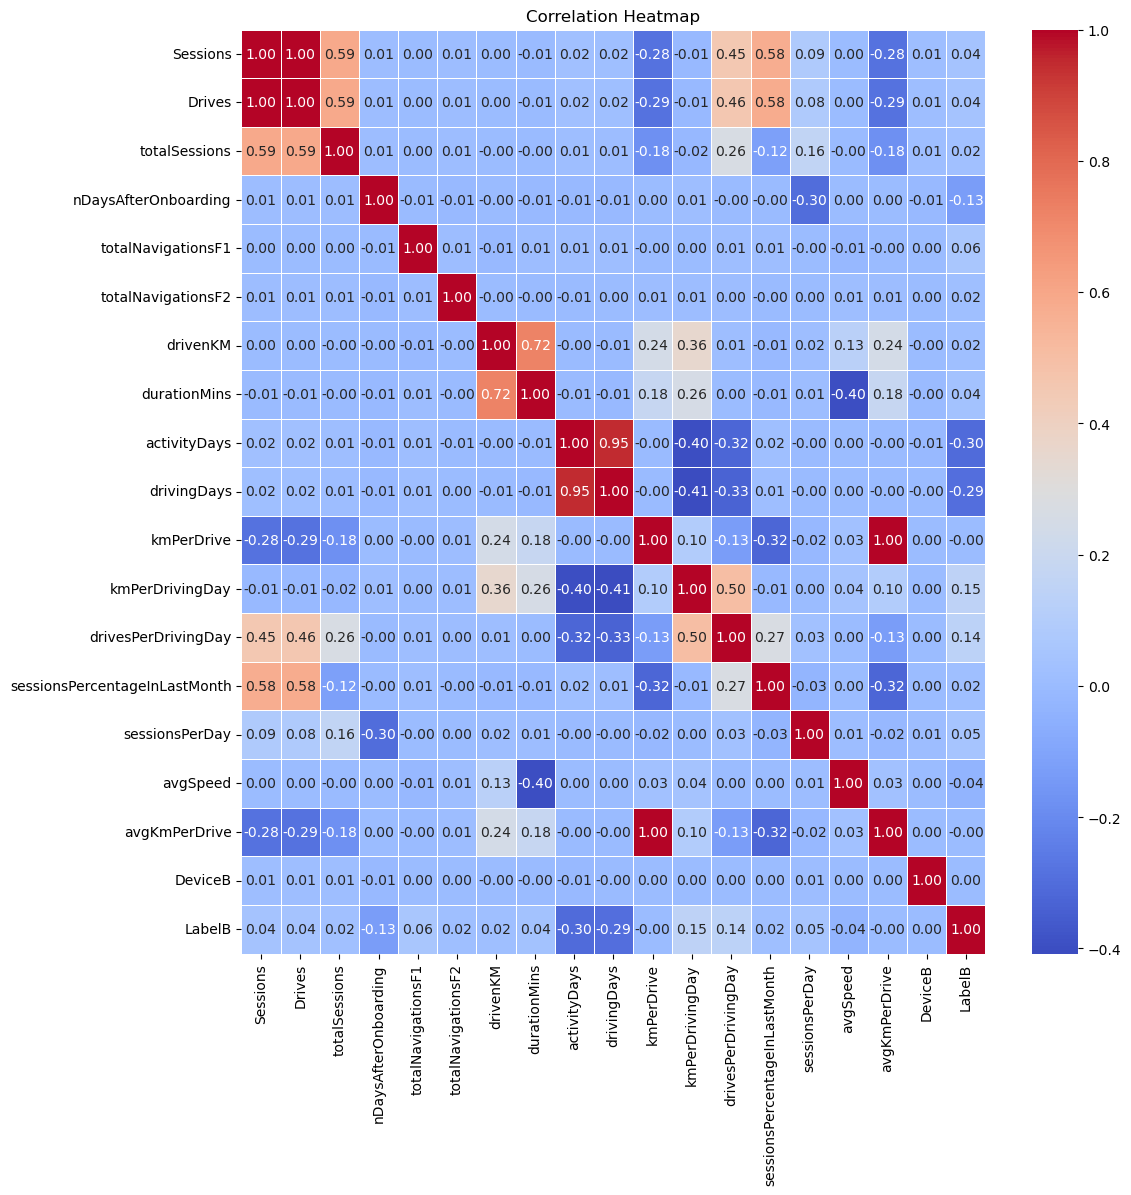

In [23]:
correlationMatrix = newDataset.select_dtypes(include=[numpy.number]).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Drop one variable from each correlated pair
newDataset.drop(columns=['Drives', 'drivingDays', 'kmPerDrive'], inplace=True)

# Drop the categorical variables
newDataset.drop(columns=['Device', 'Label'], inplace=True)

# Separate the data into features (X) and target (y)
X = newDataset.drop(columns=['LabelB'])
y = newDataset['LabelB']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [25]:
model = LogisticRegression(penalty=None, max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty=None)

In [26]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n\033[0;33;40m Logistic Regression Accuracy: {accuracy:.4f} ")

precision = precision_score(y_test, y_pred)
print(f"\n\033[0;33;40m Logistic Regression Precision: {precision:.4f} ")

recall = recall_score(y_test, y_pred)
print(f"\n\033[0;33;40m Logistic Regression Recall: {recall:.4f} ")

f1 = f1_score(y_test, y_pred)
print(f"\n\033[0;33;40m Logistic Regression F1-Score: {f1:.4f} ")

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=["retained", "churned"])
print("\n\033[0;33;40m Logistic Regression Classification Report:\n", class_report)


 Logistic Regression Accuracy: 0.8235 

 Logistic Regression Precision: 0.5146 

 Logistic Regression Recall: 0.1058 

 Logistic Regression F1-Score: 0.1755 

 Logistic Regression Classification Report:
               precision    recall  f1-score   support

    retained       0.84      0.98      0.90      2320
     churned       0.51      0.11      0.18       501

    accuracy                           0.82      2821
   macro avg       0.67      0.54      0.54      2821
weighted avg       0.78      0.82      0.77      2821



> The logistic regression model achieved an accuracy of approximately 82%, indicating that it correctly predicted the user's retention or churn status in roughly 82% of cases. However, accuracy alone is not a sufficient metric, especially when dealing with imbalanced datasets like this one. The precision of around 51% suggests that the model correctly identified retained users 51% of the time, which is somewhat low. The recall, measuring the model's ability to detect churned users, is only around 11%, indicating that it misses a significant portion of churned users. The low recall is a concern, as it means the model doesn't identify many of the users who are actually churning. The F1-score, which balances precision and recall, is also relatively low at approximately 18%.

> In summary, while the model demonstrates decent accuracy, its limited precision and especially low recall make it suboptimal for predicting user churn. To improve model performance, more advanced algorithms and further feature engineering may be required to better capture the complex relationships within the data and enhance churn prediction capabilities.

## Finding Best Model

- We first compare the performance of three different models: Random Forest Classifier, XGBoost Classifier, and Logistic Regression.
- After identifying the best model (Random Forest or XGBoost), we proceed to perform hyperparameter tuning on the chosen model.
- Once the hyperparameter tuning is complete, we re-evaluate the best model to see if its performance has improved.

In [27]:
rf_model = RandomForestClassifier(random_state=15)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1_score = f1_score(y_test, rf_preds)

print(f"\n\033[0;33;40m Random Forest Model Accuracy: {rf_accuracy:.4f}")
print(f"\n\033[0;33;40m Random Forest Model Precision: {rf_precision:.4f}")
print(f"\n\033[0;33;40m Random Forest Model Recall: {rf_recall:.4f}")
print(f"\n\033[0;33;40m Random Forest Model F1-Score: {rf_f1_score:.4f}")


 Random Forest Model Accuracy: 0.8213

 Random Forest Model Precision: 0.4885

 Random Forest Model Recall: 0.1277

 Random Forest Model F1-Score: 0.2025


In [28]:
xgb_model = XGBClassifier(objective='binary:logistic', random_state=15)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1_score = f1_score(y_test, xgb_preds)

print(f"\n\033[0;33;40m XGBoost Model Accuracy: {xgb_accuracy:.4f}")
print(f"\n\033[0;33;40m XGBoost Model Precision: {xgb_precision:.4f}")
print(f"\n\033[0;33;40m XGBoost Model Recall: {xgb_recall:.4f}")
print(f"\n\033[0;33;40m XGBoost Model F1-Score: {xgb_f1_score:.4f}")


 XGBoost Model Accuracy: 0.8065

 XGBoost Model Precision: 0.4026

 XGBoost Model Recall: 0.1856

 XGBoost Model F1-Score: 0.2541


- **Logistic Regression** achieves the highest accuracy at 82.35%, but its recall is low at 10.58%, indicating limitations in identifying churn.
- **Random Forest** strikes a better balance between precision and recall with 82.13% accuracy and 12.77% recall.
- **XGBoost**, while having the lowest accuracy at 80.65%, excels in balancing precision and recall (40.26% and 18.56%, respectively), resulting in a higher F1-score of 25.41%.
- For situations where minimizing false negatives is crucial, XGBoost offers a superior choice due to its balanced performance. In the next step, we will further enhance XGBoost through hyperparameter tuning.

## Hyperparameter Tuning for XGBoost

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
xgb = XGBClassifier(objective='binary:logistic', random_state=15)

# Hyperparameters to tune
param_grid = {
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 200, 300]
}


scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearchCV
xgb_cv = GridSearchCV(xgb, param_grid, scoring=scoring, cv=4, refit='recall')

# Fit the model to the training data
xgb_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparameters = xgb_cv.best_params_

# Use XGBoost model to predict on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1_score = f1_score(y_test, xgb_preds)

print(f"\n\033[0;33;40m Best Fit XGBoost Model Accuracy: {xgb_accuracy:.4f}")
print(f"\n\033[0;33;40m Best Fit XGBoost Model Precision: {xgb_precision:.4f}")
print(f"\n\033[0;33;40m Best Fit XGBoost Model Recall: {xgb_recall:.4f}")
print(f"\n\033[0;33;40m Best Fit XGBoost Model F1-Score: {xgb_f1_score:.4f}")


 Best Fit XGBoost Model Accuracy: 0.7905

 Best Fit XGBoost Model Precision: 0.3510

 Best Fit XGBoost Model Recall: 0.2116

 Best Fit XGBoost Model F1-Score: 0.2640


In [31]:
warnings.filterwarnings('always')
pandas.options.mode.chained_assignment = 'warn'

> The revised XGBoost model has a slightly lower accuracy (0.7905 vs. 0.8065) and precision (0.3510 vs. 0.4026).

> However, it exhibits improvements in recall (0.2116 vs. 0.1856), and F1-score (0.2640 vs. 0.2541).

> It is an overall positive outcome, and the tuned XGBoost model can be considered an improvement over the previous version.

---

<div align="center">
    <b>Considerations for Model Utilization</b>
</div>

This model should not be the sole basis for consequential business decisions due to its limited predictive power, notably its low recall score. However, it can be a valuable tool for guiding further exploratory efforts and identifying areas for data improvement, making it useful in a research and development context.

The decision to use this model should hinge on the specific business context and the potential impact of its predictions.

---

<div align="center">
    <b>In Conclusion</b>
</div>

- We can visualize the key features using the "Gain" metric.
- Features with higher 'gain' contribute more to the improvement in the model's predictive power.

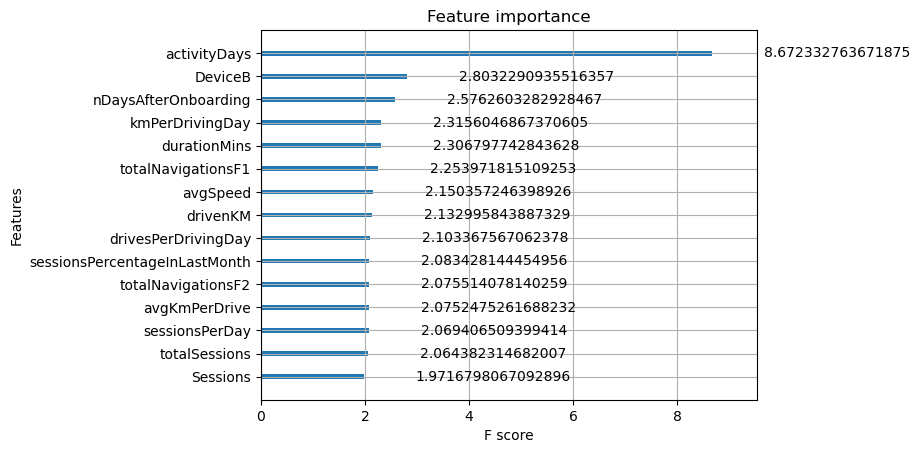

In [32]:
xgboost.plot_importance(xgb_cv.best_estimator_, importance_type='gain')
plt.show()